In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../data/weather_classification_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [4]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [5]:
df.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location', 'Weather Type'],
      dtype='object')

In [6]:
df['Cloud Cover'].unique()

array(['partly cloudy', 'clear', 'overcast', 'cloudy'], dtype=object)

In [7]:
df['Season'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [8]:
df['Location'].unique()

array(['inland', 'mountain', 'coastal'], dtype=object)

## Data pre-processing

1. Label encoding untuk data-data categorical, diubah menjadi tipe numeric agar bisa diproses oleh algoritma machine learning

In [9]:
# label encoding untuk kolom Cloud Cover
type_cloud_cover = {
    'partly cloudy': 0,
    'clear': 1,
    'overcast': 2,
    'cloudy': 3
}

In [10]:
# df['Cloud Cover'] = df['Cloud Cover'].replace(type_cloud_cover, inplace=False)

In [11]:
df['Cloud Cover'].unique()

array(['partly cloudy', 'clear', 'overcast', 'cloudy'], dtype=object)

In [12]:
# label encoding untuk kolom Season
season_type = {
    'Winter': 0, 
    'Spring': 1,
    'Summer': 2,
    'Autumn': 3
}

# df['Season'] = df['Season'].replace(season_type)

In [13]:
# label encoding untuk kolom location
'inland', 'mountain', 'coastal'

location_type = {
    'inland': 0,
    'mountain': 1, 
    'coastal': 2
}

# df['Location'] = df['Location'].replace(location_type)

In [14]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [15]:
df.describe().round(2)

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.00,13200.00,13200.00,13200.00,13200.00,13200.00,13200.00
mean,19.13,68.71,9.83,53.64,1005.83,4.01,5.46
std,17.39,20.19,6.91,31.95,37.20,3.86,3.37
min,-25.00,20.00,0.00,0.00,800.12,0.00,0.00
25%,4.00,57.00,5.00,19.00,994.80,1.00,3.00
50%,21.00,70.00,9.00,58.00,1007.65,3.00,5.00
75%,31.00,84.00,13.50,82.00,1016.77,7.00,7.50
max,109.00,109.00,48.50,109.00,1199.21,14.00,20.00


One-hot encoding untuk tipe data categorical. Ini menarik kenapa tidak dilakukan label encoding seperti pada contoh praktikum

Alasan utamanya adalah karena label encoding atau memberikan nilai numeric unik untuk representasi data mengisyaratkan adanya hierarki pada data. Misalkan antara 0, 1, 2, model akan mengira bahwa 2 lebih penting dari 1. 

Alasan berikutnya berkaitan dengan model KNN
karena KNN menghitung jarak antar data. Jadi ketika kita melakukan encode data dengan label encode titik data satu bisa jadi menghasilkan nilai jarak yang lebih tinggi, padahal belum tentu secara intuitif begitu.

In [16]:
# one hot encoding data
from sklearn.preprocessing import OneHotEncoder

In [17]:
encoder = OneHotEncoder(sparse_output=False)

In [18]:
feature_data = df.drop('Weather Type', axis=1)
feature_data

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain
...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland


In [19]:
# mengambil data-data kategorikal untuk di encoding


data_kategori = feature_data.select_dtypes(include=['object']).columns.tolist()

In [20]:
data_kategori

['Cloud Cover', 'Season', 'Location']

In [21]:
one_hot_encoded = encoder.fit_transform(feature_data[data_kategori])

In [22]:
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(data_kategori))

In [23]:
feature_encoded = pd.concat([feature_data, one_hot_df], axis=1)

In [24]:
feature_encoded = feature_encoded.drop(data_kategori, axis=1)

In [25]:
feature_encoded

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Cloud Cover_clear,Cloud Cover_cloudy,Cloud Cover_overcast,Cloud Cover_partly cloudy,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Location_coastal,Location_inland,Location_mountain
0,14.0,73,9.5,82.0,1010.82,2,3.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,39.0,96,8.5,71.0,1011.43,7,10.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,30.0,64,7.0,16.0,1018.72,5,5.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,38.0,83,1.5,82.0,1026.25,7,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,27.0,74,17.0,66.0,990.67,1,2.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,1003.15,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
13196,-1.0,76,3.5,23.0,1067.23,1,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
13197,30.0,77,5.5,28.0,1012.69,3,9.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
13198,3.0,76,10.0,94.0,984.27,0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


2. Melakukan label encoding untk data target


In [26]:
df['Weather Type'].unique()

array(['Rainy', 'Cloudy', 'Sunny', 'Snowy'], dtype=object)

In [27]:
target_encode = {
    'Rainy': 0,
    'Cloudy': 1,
    'Sunny': 2, 
    'Snowy': 3
}

df['Weather Type'] = df['Weather Type'].replace(target_encode)

/var/folders/05/16tm42991snf6c27rs7nssdh0000gn/T/ipykernel_8694/635130717.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Weather Type'] = df['Weather Type'].replace(target_encode)


2. Membagi data feature dan data target

In [28]:
df = pd.concat([feature_encoded,  df['Weather Type']], axis=1)

In [29]:
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Cloud Cover_clear,Cloud Cover_cloudy,Cloud Cover_overcast,Cloud Cover_partly cloudy,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Location_coastal,Location_inland,Location_mountain,Weather Type
0,14.0,73,9.5,82.0,1010.82,2,3.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
1,39.0,96,8.5,71.0,1011.43,7,10.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
2,30.0,64,7.0,16.0,1018.72,5,5.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2
3,38.0,83,1.5,82.0,1026.25,7,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2
4,27.0,74,17.0,66.0,990.67,1,2.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,1003.15,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
13196,-1.0,76,3.5,23.0,1067.23,1,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3
13197,30.0,77,5.5,28.0,1012.69,3,9.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
13198,3.0,76,10.0,94.0,984.27,0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3


In [35]:
# membagi dataset untuk training dan testing dengan pembagian 80:20
from sklearn.model_selection import train_test_split

X = df.drop('Weather Type', axis=1)

y = df['Weather Type']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
X_train.shape, X_test.shape

((10560, 18), (2640, 18))

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
model = KNeighborsClassifier(n_neighbors=3)

In [41]:
model.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [42]:
y_predict = model.predict(X_test)

In [48]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

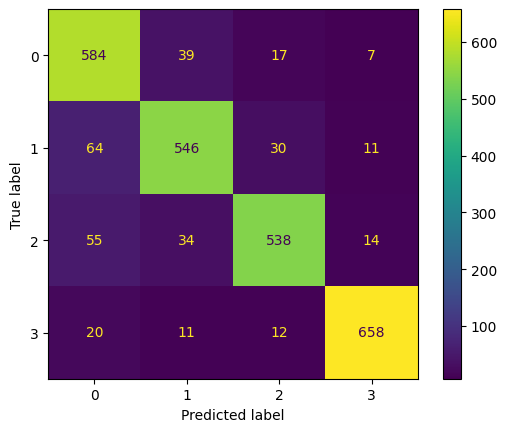

In [46]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

In [51]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       647
           1       0.87      0.84      0.85       651
           2       0.90      0.84      0.87       641
           3       0.95      0.94      0.95       701

    accuracy                           0.88      2640
   macro avg       0.88      0.88      0.88      2640
weighted avg       0.88      0.88      0.88      2640

